In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# random seed
np.random.seed(42) # This if we are working in numpy generated numbers

# Set seed for os (Full control over reproducibility when codes depend on system generated randomness)/content/drive/MyDrive/Colab Notebooks/Machine Learning/Projects/Binomial Classification/Diabetes /diabetes_data.csv/content/drive/MyDrive/Colab Notebooks/Machine Learning/Projects/Binomial Classification/Diabetes /diabetes_data.csv
os.environ['PYTHONHASHSEED'] = '42'

# Data
db = pd.read_csv('diabetes_data.csv')
data = db.copy()

In [2]:
# Features and target variable
X = data.drop(columns="Outcome")
y = data.Outcome

# Data set
This dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases. Its purpose is to predict whether a patient has diabetes based on specific diagnostic measurements included in the dataset. The selection of instances from a larger database was subject to several constraints. Notably, all patients are females of Pima Indian heritage who are at least 21 years old.

The dataset contains various variables, some of which are independent (medical predictor variables), while one dependent variable (Outcome) serves as the target.

# Data review

The dataset contains eight features used to predict whether a patient has a potential risk for diabetes. The initial step involves examining the data for missing values and extreme outliers. This process includes utilizing tools to identify missing values within the features and reviewing basic summary statistics.

In [3]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
# Target
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [5]:
# Review: Identfying if any null values in the data
# Reviewing datatypes to make sure they are properly represented.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [6]:
# review min values for each feature.
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


### Null Analysis

The outputs indicate no missing values (nulls); however, some features have a minimum value of zero, which requires further evaluation to determine if these values are valid. A 'true zero' would suggest that the feature can legitimately take a value of zero. For example, it’s crucial to assess whether it’s realistic for an individual to have a blood pressure of zero.

Where a zero value is deemed unrealistic within a given feature, it shall be replaced with a null value. Imputation will then be performed using the median of the respective feature's values.

Addressing this issue requires domain expertise and a deeper understanding of the data to maintain consistency and avoid misinterpretation.



The following features have a zero values, as identified.

**Feature list:**  
- Glucose  
- BloodPressure  
- SkinThickness  
- Insulin  
- BMI  

**Note:**  
- `Outcome` is the dependent variable.  

- `Pregnancies` can have a "true zero", as it is possible for an individual to have no pregnancies in their lifetime.

- `DiabetesPedigreeFunction` can have a "true zero" as this is a score given based off family history of having diabetes

- `Age` has a minimum value of `21`

The following features contain null values. These null values will be treated and imputed accordingly.

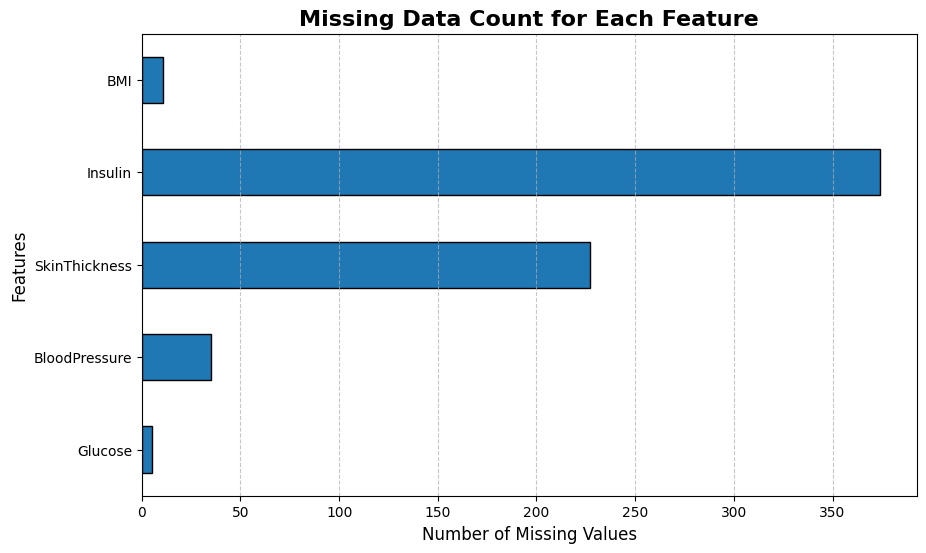

               Count
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11


In [7]:
# Null columns, excluding Pregnancies, DiabetesPedigreeFunction, and age
X[['Glucose','BloodPressure','SkinThickness', 'Insulin','BMI']] = X[['Glucose','BloodPressure','SkinThickness', 'Insulin','BMI']].replace(0, np.nan)

# null count
null_counts = pd.DataFrame(X.isnull().sum(), columns=['Count'])

# Removing columns Age, Dp, and pregnancies
null_counts.drop(index=['Age', 'DiabetesPedigreeFunction', 'Pregnancies'], inplace=True)

# Plot
null_counts.plot(kind='barh', edgecolor='black', figsize=(10, 6), legend=False)

plt.title("Missing Data Count for Each Feature", fontsize=16, fontweight='bold')
plt.xlabel("Number of Missing Values", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.style.use('bmh')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# Null counts for zero replacement.
print(null_counts)

The following features had a minimum value of zero. These features were converted to null values for proper imputation.  Pregnancies has a zero count of 111. This feature will remain unchanged, as this feature contains true zeros. All other features appear to have been properly converted, based on the minimum value of each feature.

In [8]:
for feature in X.columns:
    min_value = X[feature].min()
    min_count = (X[feature] == min_value).sum()
    print(f"Minimum value in {feature}: {min_value}, Minimum value count: {min_count}")

Minimum value in Pregnancies: 0, Minimum value count: 111
Minimum value in Glucose: 44.0, Minimum value count: 1
Minimum value in BloodPressure: 24.0, Minimum value count: 1
Minimum value in SkinThickness: 7.0, Minimum value count: 2
Minimum value in Insulin: 14.0, Minimum value count: 1
Minimum value in BMI: 18.2, Minimum value count: 3
Minimum value in DiabetesPedigreeFunction: 0.078, Minimum value count: 1
Minimum value in Age: 21, Minimum value count: 63


The histograms indicate that some features deviate from a normal distribution, with several exhibiting long tails that could impact the model and introduce bias. Many features display right skewness, while others, such as blood pressure and glucose levels, follow a distribution closer to a bell curve.

Specifically, the Glucose feature shows a cutoff around 190, whereas blood pressure values can exceed 120 but are generally capped at that level.

Features like skin thickness, insulin, and BMI have values starting above zero and display right-skewed tails, suggesting the presence of outliers. Additionally, missing values could further distort the data and affect model performance.

Finally, the Pregnancies feature starts at zero, while diabetes pedigree function and age exhibit significant right skewness.

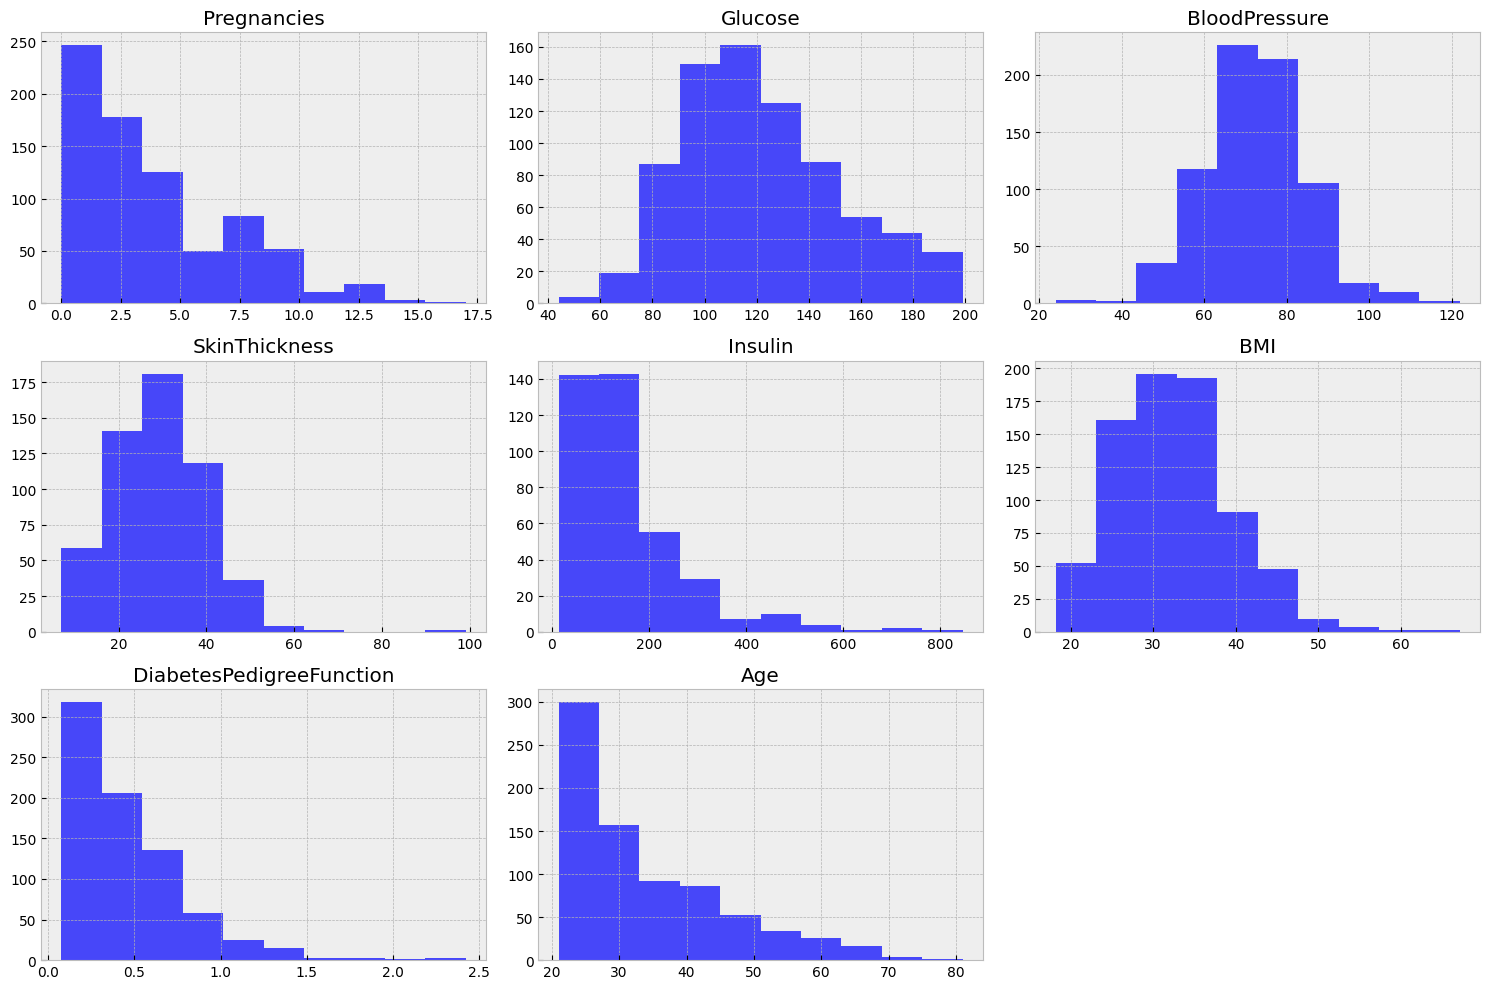

In [9]:
# Plot histograms for all features in the dataset
X.hist(color='blue', alpha=0.7, figsize=(15, 10))

plt.style.use('bmh')
plt.tight_layout()
plt.show()

## Correlations and Linear relationships

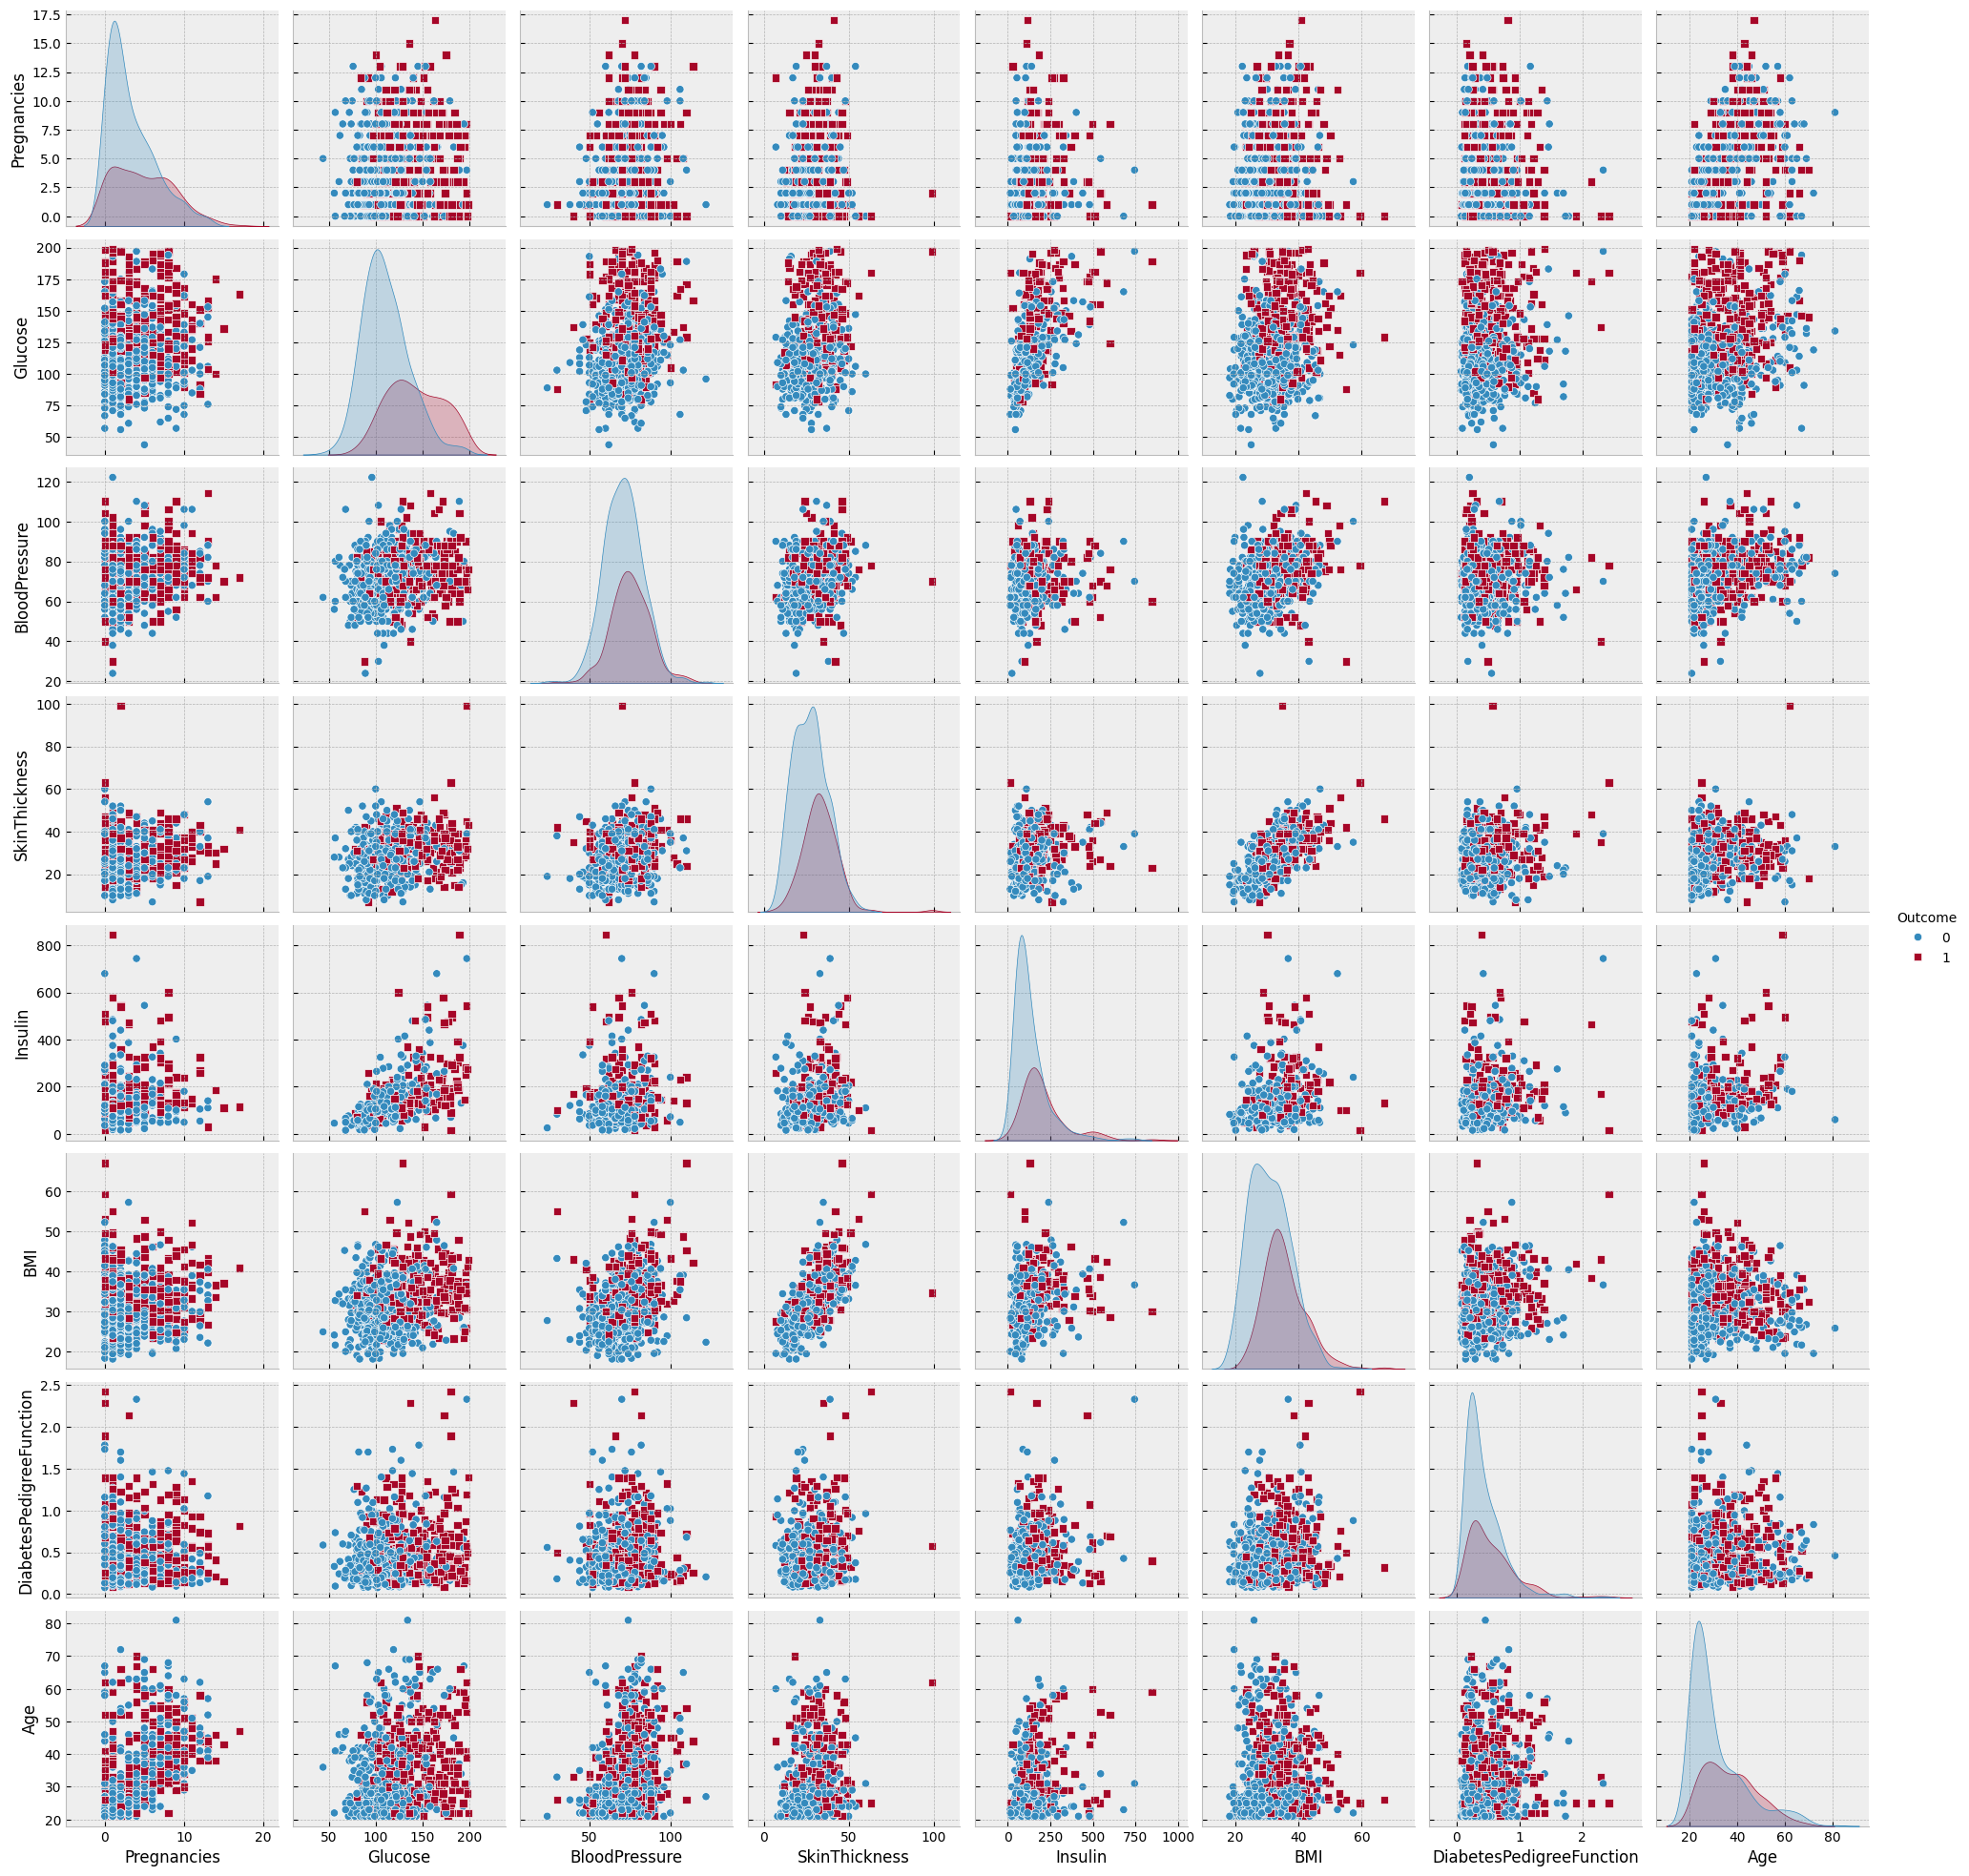

<Figure size 1500x1000 with 0 Axes>

In [10]:
# Pairplot visualization

# Combining dataset with target by axis
X_y_dataset = pd.concat([X,y], axis=1)

# Data set for pairplot
X_y_dataset = pd.DataFrame(X_y_dataset)

sns.pairplot(X_y_dataset, hue="Outcome", markers=["o", "s"])

plt.figure(figsize=(15,10))
plt.style.use('bmh')
plt.tight_layout()
plt.show();

#### Correlation Matrix

Pearson correlation measures the linear relationship between features and the target variable. All input features exhibit a positive correlation with the target, indicating that as glucose levels increase, the target outcome also increases. This suggests glucose can be significant predictor in the dataset.

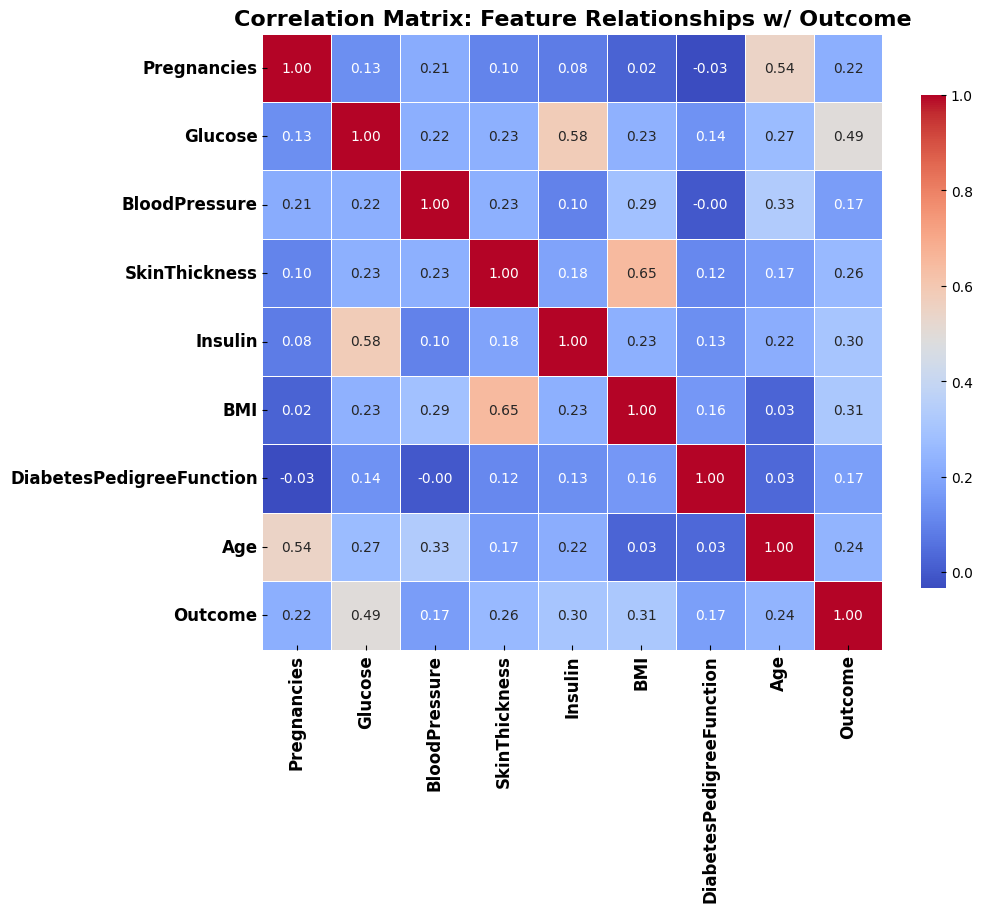

In [11]:
# Calculate the correlation matrix
cm = X_y_dataset.corr(method='pearson')

# Plot

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, cbar_kws={'shrink': 0.8})

plt.title("Correlation Matrix: Feature Relationships w/ Outcome", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(False)
plt.show()

## Training and Test Data

The dataset will be split in an 80/20 ratio, with stratification applied to ensure that the target categories are represented proportionally in both the training and test sets.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Data Processing

Tasks:

1. Adress null values and determine imputing method
2. Scale values
3. Determine if encoded is needed for any categorical data.


In [13]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90.0,62.0,12.0,43.0,27.2,0.580,24
711,5,126.0,78.0,27.0,22.0,29.6,0.439,40
373,2,105.0,58.0,40.0,94.0,34.9,0.225,25
46,1,146.0,56.0,NaN,NaN,29.7,0.564,29
682,0,95.0,64.0,39.0,105.0,44.6,0.366,22


## Feature Pipeline

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Pipeline imputes missing values with median
# Pipeline standardizes each feature by removing the mean and scaling to unit variance.
# Encoding is not needed.
pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

In [15]:
# Training data
X_train = pipeline.fit_transform(X_train)

In [16]:
# Test data. This will only be used for evaluating the final model.
# We always transform new "unseen data", never fit it ;)
X_test = pipeline.transform(X_test)

#### Transformed Features

In [17]:
# Transformed dataframe
X_transformed = pd.DataFrame(X_train, columns=X.columns)
X_transformed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.851355,-1.056427,-0.826740,-1.918187,-1.203361,-0.769694,0.310794,-0.792169
1,0.356576,0.144399,0.477772,-0.229874,-1.470195,-0.417714,-0.116439,0.561034
2,-0.549372,-0.556083,-1.152868,1.233330,-0.555335,0.359576,-0.764862,-0.707594
3,-0.851355,0.811525,-1.315932,-0.004766,-0.161437,-0.403048,0.262314,-0.369293
4,-1.153338,-0.889646,-0.663676,1.120776,-0.415565,1.782163,-0.337630,-0.961320


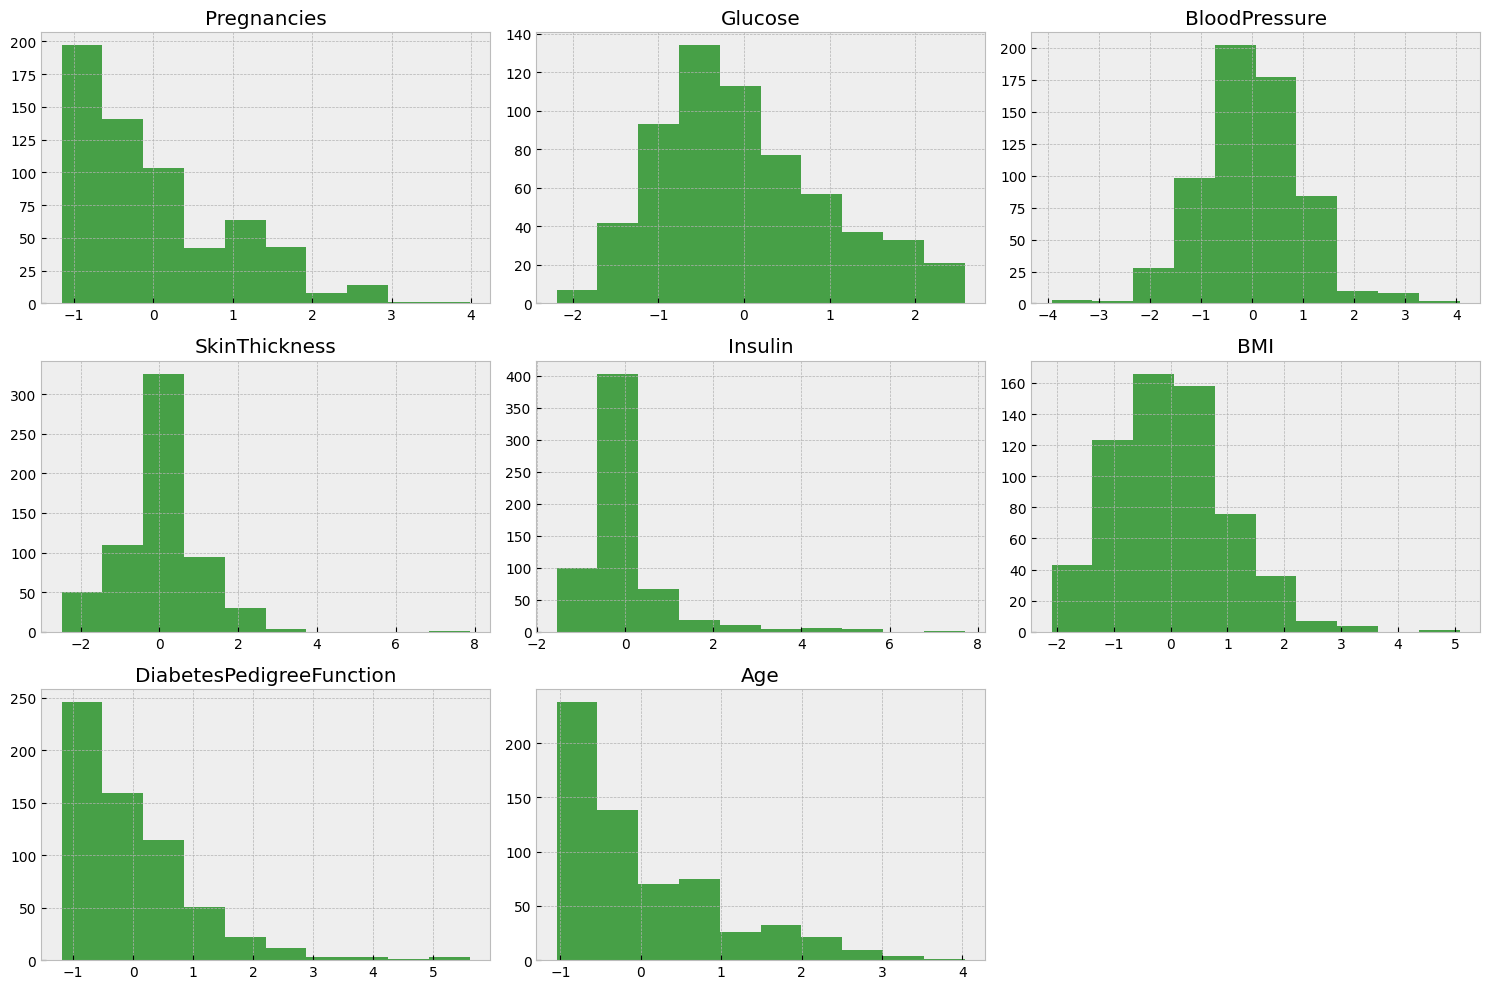

In [18]:
# Transformed features
X_transformed.hist(color='Green', alpha=0.7, figsize=(15, 10))

plt.style.use('bmh')
plt.tight_layout()
plt.show()

# Model

## Logisitic Classifier

Logistic Regression is a statistical method that can be used for binary classification, where the goal is to predict the probability of an instance belonging to one of two classes. It starts by calculating a linear combination of the input features and then applies the sigmoid function to transform this into a probability between 0 and 1. The model predicts the positive class if the probability is above a certain threshold (typically 0.5) and the negative class otherwise. During training, it adjusts the weights to minimize the difference between predicted probabilities and actual outcomes. Logistic regression is simple, fast, and highly interpretable, making it a good choice for binary classification tasks.

Initially, the model is trained with regularization (e.g., using the `liblinear` solver), which minimizes the cost function by optimizing the model's parameters (such as weights or coefficients). This process aims to make the model's predictions as accurate as possible based on the provided training data.

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, solver='liblinear') # Small dataset optimizer, initial regulizer

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

## **Initial Evaluation**  

### **Confusion Matrix**  

The confusion matrix metrics indicate the following:  
- **True Negatives (TN):** 362  
- **False Positives (FP):** 38  
- **False Negatives (FN):** 87  
- **True Positives (TP):** 127  

In the context of healthcare, **false negatives** are critical, as they represent cases where individuals with diabetes are misclassified as not having the condition. This type of error, known as a **Type II error**, can lead to missed diagnoses and delayed treatment.  

The primary objective of the model is to accurately identify instances of diabetes. Minimizing false negatives is essential, as failing to detect diabetes could have severe health consequences. Adjustments to the model threshold and optimization techniques may be necessary to improve recall and reduce missed cases.

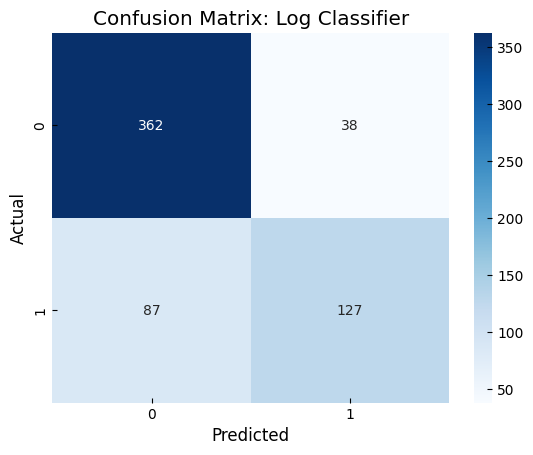

In [20]:
from sklearn.metrics import confusion_matrix

# Training predictions
y_pred_train = log_reg.predict(X_train)

# Corr matrix
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix: Log Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

#### Classification Report Summary

The initial classification report evaluates the model’s performance prior to hyperparameter tuning, focusing on two classes: "no diabetes" (0) and "has diabetes" (1).

- **Class 0 (No Diabetes)**: The model performs well with **81% precision**, **91% recall**, and an **F1-score of 0.85**, indicating that it effectively identifies most negative cases.
  
- **Class 1 (Has Diabetes)**: The model shows lower performance for this class, with **77% precision**, **59% recall**, and an **F1-score of 0.67**, meaning it misses a significant number of positive cases (diabetes).

- **Overall Performance**: The model has an **accuracy of 80%**, but the class imbalance skews this figure. The **macro average** F1-score is 0.76, while the **weighted average** F1-score is 0.79, reflecting the influence of class 0’s larger representation.

In conclusion, while the model performs well for "no diabetes" cases, its ability to detect "has diabetes" cases could be improved, especially in terms of recall. Hyperparameter tuning and adjustments for class imbalance could enhance its ability to detect positive instances.

In [21]:
from sklearn.metrics import classification_report

log_classification_rpt = classification_report(y_train, y_pred_train)

print(log_classification_rpt)

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       400
           1       0.77      0.59      0.67       214

    accuracy                           0.80       614
   macro avg       0.79      0.75      0.76       614
weighted avg       0.79      0.80      0.79       614



#### Predictions vs Actual

The Predictions vs. Actual plot visually illustrates how the model classifies instances as either having diabetes or not. The two categories are separated by a decision boundary, which represents the model's criteria for making classification decisions.

The model successfully classifies the majority of instances, showcasing strong predictive performance. However, there are some misclassifications, which are apparent in the plot. These errors highlight areas where the model could benefit from improvement, particularly in distinguishing between certain cases.

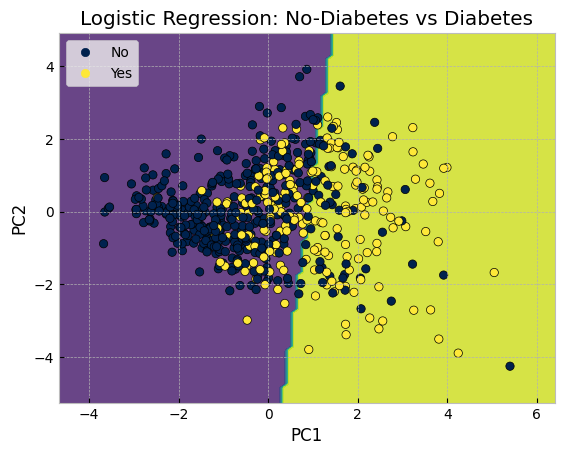

In [22]:
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_transformed_2d = pca.fit_transform(X_train)

# Re-train Train a logistic regression model on the 2D data
log_reg_2d = LogisticRegression(random_state=42, solver='liblinear') # Regularizer
log_reg_2d.fit(X_transformed_2d, y_train)

# Now, you can plot the decision boundary using this new model
display = DecisionBoundaryDisplay.from_estimator(
    log_reg_2d, X_transformed_2d, response_method="predict", alpha=0.8
)

# Create scatter plot for the test points, colored by categories (y_test)
scatter = display.ax_.scatter(
    X_transformed_2d[:, 0], X_transformed_2d[:, 1], c=y_train, edgecolor="k", cmap='cividis'
)

# Set labels for the axes and title
display.ax_.set_title("Logistic Regression: No-Diabetes vs Diabetes")

# Add axis labels (PCA components as feature names)
display.ax_.set_xlabel('PC1')  # First principal component
display.ax_.set_ylabel('PC2')  # Second principal component


# Add the legend with labels
handles, labels = scatter.legend_elements()

# Customize the legend if needed (ensure it matches the y_test categories)
category_labels = ['No', 'Yes']  # Adjust according
plt.legend(handles, category_labels, loc='upper left')

# Show the plot
plt.show()

 #### Cross-Validation Predict

 Cross-fold prediction involves training and evaluating the model across different folds of data. Each fold serves as a test set exactly once, and the model's performance is predicted (or evaluated) on the test fold during each iteration. The goal is to get a more reliable estimate of the model's generalization performance by testing it on multiple, different subsets of the data.

In simpler terms, cross-fold prediction involves predicting outcomes on different "folds" or subsets of the dataset, ensuring that every instance in the dataset is used for both training and testing at least once. This helps to avoid overfitting and provides a more robust evaluation of the model.

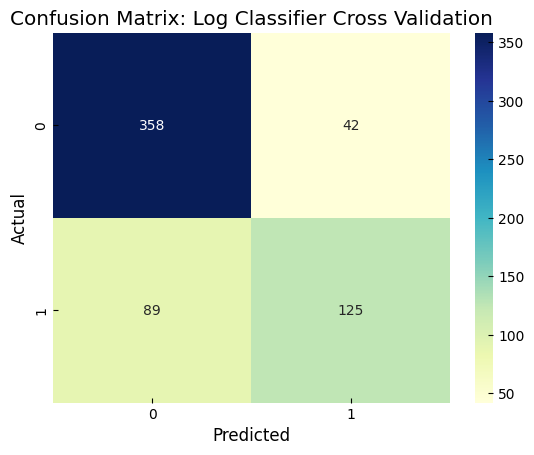

In [23]:
from sklearn.model_selection import cross_val_predict

cv_log_reg = cross_val_predict(log_reg, X_train,
                               y_train, cv=8, method='predict')

# Confusion matrix
cm_cv = confusion_matrix(y_train, cv_log_reg)
sns.heatmap(cm_cv, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion Matrix: Log Classifier Cross Validation')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

#### Cross Validation (Accuracy Scoring)

Similar to the method of cross-fold prediction, cross-fold scoring is a technique used to evaluate the performance of a machine learning model based on a accuracy scoring method. The dataset is split into multiple subsets, known as folds. The model is trained on one subset and tested on the remaining portion. This process is repeated multiple times with different training and testing splits, ensuring consistent performance across various subsets of the data. This technique enables the evaluation of model accuracy, performance, and other selected metrics.

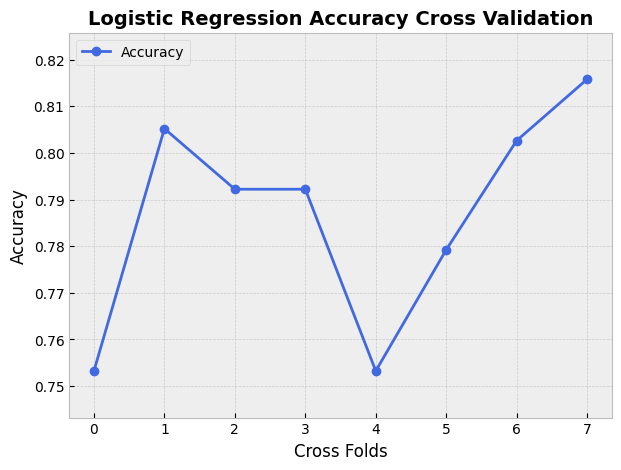

Average Accuracy Score accross 8 folds: Accuracy    0.79
dtype: float64


In [24]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_log_reg_accuracy = cross_val_score(log_reg, X_train, y_train, cv=8, scoring='accuracy')

# Create a DataFrame for plotting
accuracy_df = pd.DataFrame(cv_log_reg_accuracy, columns=['Accuracy'])

# Plot the cross-validation results
plt.figure(figsize=(7, 5))  # Adjust figure size
plt.plot(accuracy_df.index, accuracy_df['Accuracy'], marker='o', linestyle='-', linewidth=2, markersize=6, label="Accuracy", color="royalblue")

# Formatting
plt.title("Logistic Regression Accuracy Cross Validation", fontsize=14, fontweight='bold')
plt.xlabel("Cross Folds", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(accuracy_df.index)  # Ensures whole number fold labels
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(loc="upper left", fontsize=10)
plt.ylim(min(accuracy_df['Accuracy']) - 0.01, max(accuracy_df['Accuracy']) + 0.01)  # Slight padding for better visuals
plt.show()

# Average accuracy score accross 8 folds
print(f'Average Accuracy Score accross 8 folds: {accuracy_df.mean().round(2)}')

#### Hyperparemter Tunning

Hyperparameter tuning is essential for optimizing model performance by selecting the best hyperparameters, which are set before training and influence the learning process. Proper tuning can improve accuracy, precision, recall, and other metrics by identifying the hyperparameter values that work best for the dataset.

Tuning also helps prevent overfitting and underfitting by adjusting parameters like regularization and model complexity, ensuring the model generalizes well to new data. It optimizes training efficiency by adjusting parameters. tuning enhances generalization, improving how the model performs on unseen data.

In [25]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]},
    {'solver': ['lbfgs', 'newton-cg'], 'penalty': ['l2', None], 'C': [0.01, 0.1, 1, 10]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}
]

grid_search = GridSearchCV(log_reg, param_grid, cv=10, verbose=1, n_jobs=-1)

log_reg_optimized = grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


## Final Evaluation

#### Precision Recall Curve

A Precision-Recall curve is a plot that shows the trade-off between precision and recall (sensitivity) at various thresholds. Precision indicates how many predicted positives were actually correct, while recall measures how many actual positives were correctly identified. The curve helps visualize model performance. Ideally a good model having a curve closer to the top-right, represents high precision and recall. The area under the curve (AUC) provides an overall measure of performance.

#### Identify Best Thresh

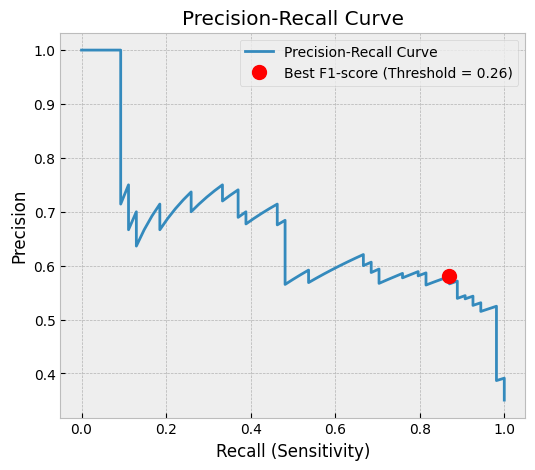

Best Threshold: 0.26


In [26]:
from sklearn.metrics import precision_recall_curve


# y_pred_prob are the predicted probabilities for the positive class | Note we can use the descion_score function to!
y_prob_test = log_reg_optimized.predict_proba(X_test)

# Calculate precision, recall, and thresholds
# Have to tell the model the category 0 or 1, We are not using the descion_function!
# If your using the thresh you dont have to select the positive class
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_test[:,1]) # replace here with thresh

# Compute F1-scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the threshold that maximizes the F1-score
best_threshold = thresholds[np.argmax(f1_scores)] # You can adjust this and give your thresh if you care more about precision or recall

# Plot Precision-Recall curve
plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Mark the point with the best F1-score on the curve
plt.plot(recalls[np.argmax(f1_scores)], precisions[np.argmax(f1_scores)],
         'ro', markersize=10, label=f'Best F1-score (Threshold = {best_threshold:.2f})')
plt.legend()
plt.grid(True)
plt.show()
print(f"Best Threshold: {best_threshold:.2f}")

#### Applied Threshold

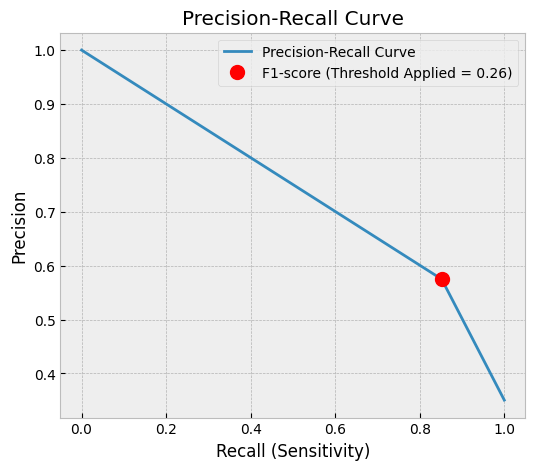

In [27]:
# Thresh applied
threshold = 0.26
y_pred_test_threshold = (y_prob_test[:, 1] >= threshold).astype(int)

# Calculate precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_test_threshold)

# Compute F1-scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the threshold that maximizes the F1-score
best_threshold = thresholds[np.argmax(f1_scores)]

# Plot Precision-Recall curve
plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Mark the point with the best F1-score on the curve
plt.plot(recalls[np.argmax(f1_scores)], precisions[np.argmax(f1_scores)],
         'ro', markersize=10, label=f'F1-score (Threshold Applied = {threshold:.2f})')
plt.legend()
plt.grid(True)
plt.show()

#### Area Under Curve

AUC of 0.76 indicates that the model has **moderate** predictive performance.

The model can distinguish between classes **76% of the time**.  



In [28]:
from sklearn.metrics import roc_auc_score # Import roc_auc_score

# AUC
log_reg_optimized_AUC_score = roc_auc_score(y_test, y_pred_test_threshold)

print(f'AUC Score: {log_reg_optimized_AUC_score:.2f}')

AUC Score: 0.76


#### Confussion Matrix
The confusion matrix demonstrates improved performance in correctly identifying individuals with diabetes (actual positives). This improvement is evident in the reduction of false negatives, indicating that fewer people with diabetes are incorrectly classified as not having the disease. Furthermore, the matrix quantifies this improvement and analyzes other important metrics such as the reduction in false positives, which represents individuals without diabetes being incorrectly diagnosed as diabetic. Analyzing both false positives and false negatives is critical in a medical context to understand the overall performance and potential impact of the diagnostic tool.









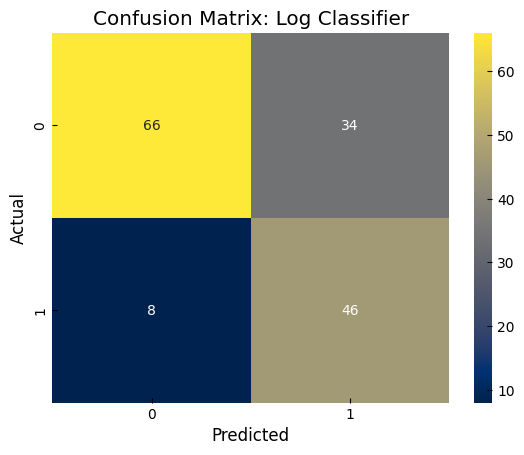

In [29]:
cm_test = confusion_matrix(y_test, y_pred_test_threshold)
sns.heatmap(cm_test, annot=True, cmap='cividis', fmt='g')
plt.title('Confusion Matrix: Log Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)

#### Predictions (Unseen/New Data)


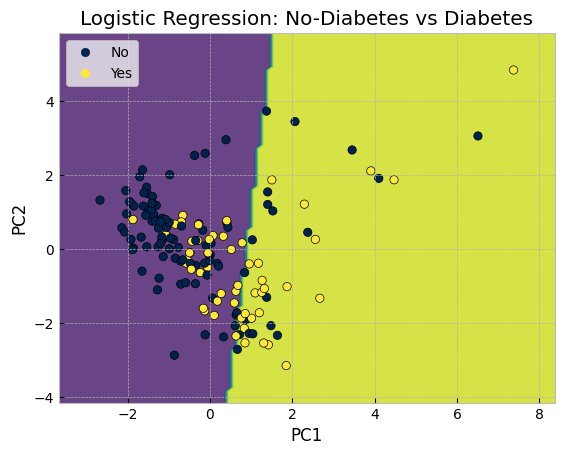

In [30]:
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)

X_transformed_2d = pca.fit_transform(X_test)

# Now, you can plot the decision boundary using this new model
display = DecisionBoundaryDisplay.from_estimator(
    log_reg_2d, X_transformed_2d, response_method="predict", alpha=0.8
)

# Create scatter plot for the test points, colored by categories (y_test)
scatter = display.ax_.scatter(
    X_transformed_2d[:, 0], X_transformed_2d[:, 1], c=y_test, edgecolor="k", cmap='cividis' # Changed to y_test
)

# Set labels for the axes and title
display.ax_.set_title("Logistic Regression: No-Diabetes vs Diabetes")

# Add axis labels (PCA components as feature names)
display.ax_.set_xlabel('PC1')  # First principal component
display.ax_.set_ylabel('PC2')  # Second principal component


# Add the legend with labels
handles, labels = scatter.legend_elements()

# Customize the legend if needed (ensure it matches the y_test categories)
category_labels = ['No', 'Yes']  # Adjust according
plt.legend(handles, category_labels, loc='upper left')

# Show the plot
plt.show()

#### Final Classification Report

The model's performance metrics indicate a mixed but balanced result. For Class 0, the model shows high precision (0.89) but lower recall (0.66), resulting in a solid F1-score of 0.76. For Class 1, the model has a lower precision (0.57) but a higher recall (0.85), with a moderate F1-score of 0.69. The overall accuracy is 0.73, meaning the model correctly predicts 73% of the instances. The macro average provides a balanced performance across classes with a precision of 0.73, recall of 0.76, and F1-score of 0.72, not accounting for class imbalance. The weighted average, considering class support, shows slightly better precision (0.78) but slightly lower recall (0.73), indicating that the model performs better for the more prevalent class.

In [31]:
classification_report(y_test, y_pred_test_threshold)

pd.DataFrame(classification_report(y_test, y_pred_test_threshold, output_dict=True)).T.round(2)

,precision,recall,f1-score,support
0,0.89,0.66,0.76,100.00
1,0.57,0.85,0.69,54.00
accuracy,0.73,0.73,0.73,0.73
macro avg,0.73,0.76,0.72,154.00
weighted avg,0.78,0.73,0.73,154.00


#### Feature Importance
The chart below shows the feature importance for the Logistic Regression model. Glucose is most influential feature, followed by BMI, Pregnancies, Diabetes Pedigree Function, Age, and lastly, Skin Thickness. Remaining features Insulin and Blood Pressure have low importance.

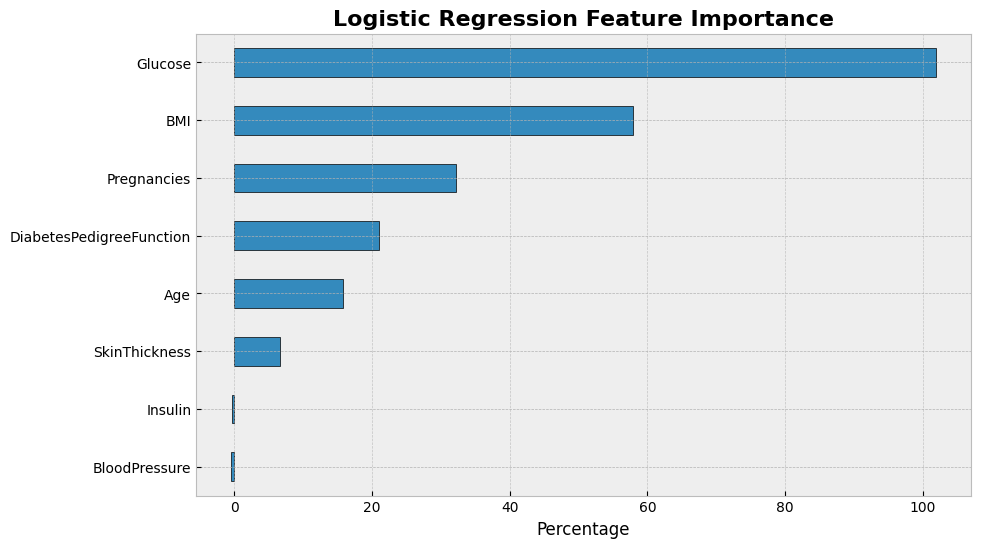

In [32]:
Feature_importance = pd.DataFrame(log_reg_optimized.best_estimator_.coef_, columns=X.columns).T

Feature_importance.columns = ['Feature_importance']

Feature_importance = Feature_importance * 100

Feature_importance.sort_values(by='Feature_importance').plot(kind='barh', edgecolor='black', figsize=(10, 6), legend=False)

plt.title("Logistic Regression Feature Importance", fontsize=16, fontweight='bold')
plt.xlabel("Percentage")
plt.style.use('bmh')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Generlerization

A drop in accuracy from 79% on the training data to 73% on the test data indicates that the model is likely experiencing mild overfitting. Overfitting occurs when a model performs significantly better on the training data than on the test data, typically because it learns not only the underlying patterns but also the noise or random fluctuations specific to the training set. In this case, while the model is still performing reasonably well on both the training and test data, the 7% drop suggests that it has learned some specific details of the training data that do not generalize perfectly to the test set, which is characteristic of mild overfitting.

To conclude the project, it is important to acknowledge that the model has shown mild overfitting, with performance on the training data being slightly higher than on the test data. To improve generalization and prevent further overfitting, strategies such as regularization, cross-validation, simplifying the model, and adding more data should be considered. Implementing these techniques will enhance the model's ability to perform well on unseen data, ensuring its reliability and effectiveness in real-world applications.

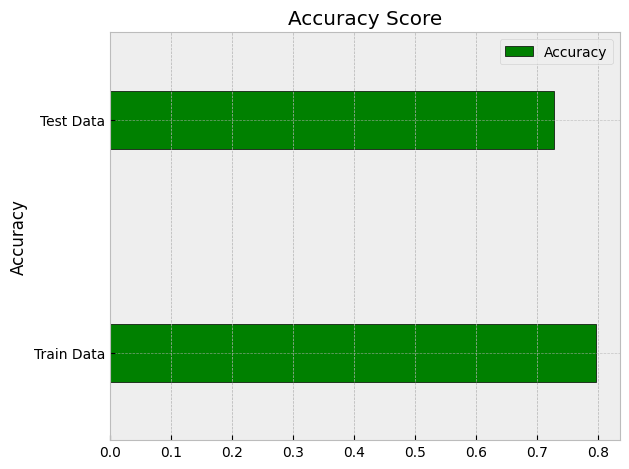

In [33]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_pred_train)

test_accuracy = accuracy_score(y_test, y_pred_test_threshold)

pd.DataFrame([train_accuracy, test_accuracy], columns=['Accuracy'], index=['Train Data', 'Test Data']).plot(kind='barh', width=0.25, edgecolor='black', color='green')

plt.title("Accuracy Score")
plt.ylabel("Accuracy")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Model created on `2/23/2025`

Author: Clayaimodels@gmail.com